# EDA - G2M insight for Cab Investment firm

### 1. Load Data

In [35]:
# Import packages
import pandas as pd
from pandas import factorize
import numpy as np
import os, glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb
plt.rcParams.update(plt.rcParamsDefault)
import calendar

In [2]:
# define functions
def prob(x):
    x = round(x.div(len(data))*100, 2)
    return x

def plot_hist(d, var_name="None", color='skyblue',bins=7, title=None, tick_rot=None):
    plt.figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.hist(d[var_name], bins=bins, color=color, edgecolor='black', linewidth=0.7)
    plt.ylabel("Counts", fontsize=16)
    plt.xlabel(var_name, fontsize=16)
    plt.xticks(rotation=tick_rot)
    plt.title(title, fontsize=16)
    plt.show()
    return

We have 4 dataset files, so let's now load all of them.

In [5]:
# load data
data_CAB = pd.read_csv("./data/Cab_Data.csv")
data_TID = pd.read_csv("./data/Transaction_ID.csv")
data_CID = pd.read_csv("./data/Customer_ID.csv")
data_CITY = pd.read_csv("./data/City.csv")

### 2. Data Understanding and Processing

After loading the data, now let's understand their field names.

We can see after loading the data that Cab_Data.csv dataset and 

In [6]:
display(data_CAB.head(), len(data_CAB))
display(data_TID.head(), len(data_TID))
display(data_CID.head(), len(data_CID))
display(data_CITY.head(), len(data_CITY))

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


359392

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


440098

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


49171

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


20

After viewinf and understanding the data filed names we can find that we have common field names such as: 
* Transaction ID >  common between  Cab_Data & Transaction_ID datasets
* Customer ID    >  common between  Customer_ID & Transaction_ID datasets

So now let's merge these data based on the common field variables and discover the dataset types

In [7]:
# Merge datasets into a master data
data = data_CAB.merge(data_TID,left_on='Transaction ID', right_on='Transaction ID').merge(data_CID,left_on='Customer ID', right_on='Customer ID')
display(data.tail(), len(data))

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
359387,10439790,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417
359388,10439799,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713
359389,10439838,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960
359390,10439840,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454
359391,10439846,43104,Yellow Cab,TUCSON AZ,13.30,244.65,180.3480,39761,Card,Female,32,10128


359392

In [8]:
data.dtypes

Transaction ID          int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
dtype: object

After learning about the data types of the dataset, in order to have more deeepr understanding of the dataset let's see the unique values we have in dataset for the following categorical fileds:
* Company
* City
* Customer ID
* Payment Mode


In [9]:
print("Number of unique values stat:")
data[["Company", "City", "Customer ID", "Payment_Mode"]].nunique()

Number of unique values stat:


Company             2
City               19
Customer ID     46148
Payment_Mode        2
dtype: int64

We can learn from the categorical variables the following,
* Operating companies: **ATLANTA GA and Yellow Cab**
* Payment Methods: **Card and Cash** 
* Trip services across: **19 cities**
* No. of Customers served: **~ 45,000**

Now we can investigate if we have aby NA data in the master dataset.

In [10]:
x = prob(data.isnull().sum())
print("Percentage of null values in data: ")
x

Percentage of null values in data: 


Transaction ID        0.0
Date of Travel        0.0
Company               0.0
City                  0.0
KM Travelled          0.0
Price Charged         0.0
Cost of Trip          0.0
Customer ID           0.0
Payment_Mode          0.0
Gender                0.0
Age                   0.0
Income (USD/Month)    0.0
dtype: float64

We can see tha we have no na values in the master dataset.

Now let's discover if we have any duplicate data and drop them if we have any.

In [11]:
data[data.duplicated(keep='first')]
# data = data.drop_duplicates(keep='first')

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)


We can see that we have no duplicate data in the master dataset and we don't need to drop any as a result.

Let's extract the col names of the numerimecial variables so that we can learn more about them.

In [12]:
data_num = data.select_dtypes(include=np.number)
cols = data.select_dtypes(include=np.number).columns.tolist()
print(cols)

['Transaction ID', 'Date of Travel', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Customer ID', 'Age', 'Income (USD/Month)']


Now let's learn about the main statiscs info about the numerical variable in the master dataset such as,
* mean
* median (50% quartile)
* range (max - min)
* std

In [13]:
data[["KM Travelled", "Price Charged", "Cost of Trip", "Age", "Income (USD/Month)"]].describe().applymap('{:,.0f}'.format)

,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month)
count,"359,392","359,392","359,392","359,392","359,392"
mean,23,423,286,35,"15,049"
std,12,274,158,13,"7,969"
min,2,16,19,18,"2,000"
25%,12,206,151,25,"8,424"
50%,22,386,282,33,"14,685"
75%,33,584,414,42,"21,035"
max,48,"2,048",691,65,"35,000"


Now let's process our data and to get useful some useful insights such as calculateing a variable for margin (price - cost)

In [14]:
data["Margin"] = (data["Price Charged"] - data["Cost of Trip"])*100 / data["Cost of Trip"]

### 3. Data Analysis

Here let's have a comprehensive visualzation of our data by building the pairs plot.

/home/elmorsym/.local/lib/python3.6/site-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 'marker', 's'
  **contour_kws,
/home/elmorsym/.local/lib/python3.6/site-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 'marker', 's'
  **contour_kws,


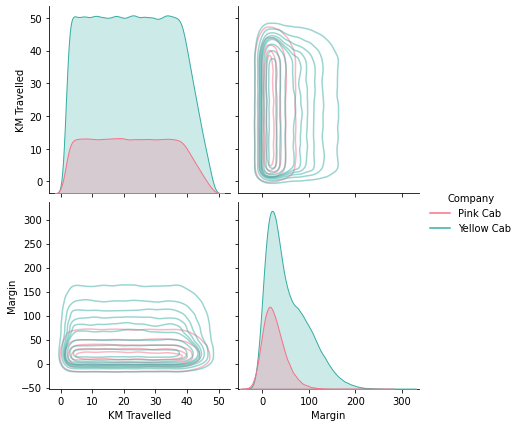

In [26]:
cols = ["KM Travelled", "Margin", "Gender", "Company"]
sb.pairplot(data[cols], hue = 'Company', diag_kind = 'kde', kind = 'kde', palette = 'husl' ,plot_kws = {'marker':'+','alpha': 0.5, 's': 1}, height = 3)


We can observe that yellow cab company can achieve higehr margins than the pink cab company.

We can also observe that the yellow cab company has significantly provided more trips that the pink cab company. We expect from that by serving more customers the margins achived can be increased. 

In [29]:
cols = ["KM Travelled", "Margin", "Gender", "Age", "Payment_Mode", "Income (USD/Month)", "Company"]
sb.pairplot(data[cols], hue = 'Company', diag_kind = 'kde', kind = 'kde', palette = 'husl')

Let's plot the Price and Cost vs. the travelled distance

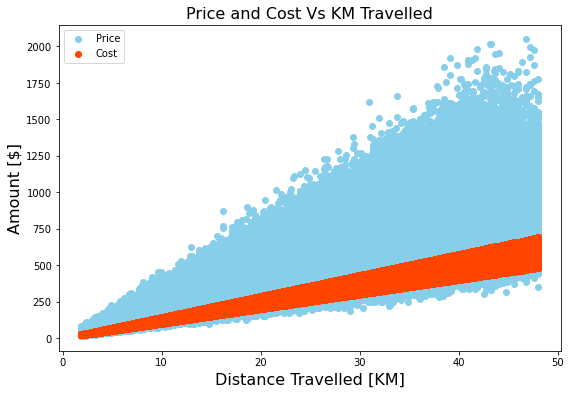

In [27]:
plt.subplots(figsize=(9,6))
plt.scatter(data["KM Travelled"],data["Price Charged"], color='skyblue')
plt.scatter(data["KM Travelled"], data["Cost of Trip"], color='orangered')
plt.legend(['Price', 'Cost'])
plt.ylabel("Amount [$]", fontsize=16)
plt.xlabel("Distance Travelled [KM]", fontsize=16)
plt.title("Price and Cost Vs KM Travelled", fontsize=16)
plt.show()

We can see that the price area envleopes the cost area where the cab companies can incure loss as well as profit.

To investigate more let's plot the margin of both companies vs. the travelled distance.

We can see the Yellow Company can generate higher profit margins and lower loss margins than the Pink Company.

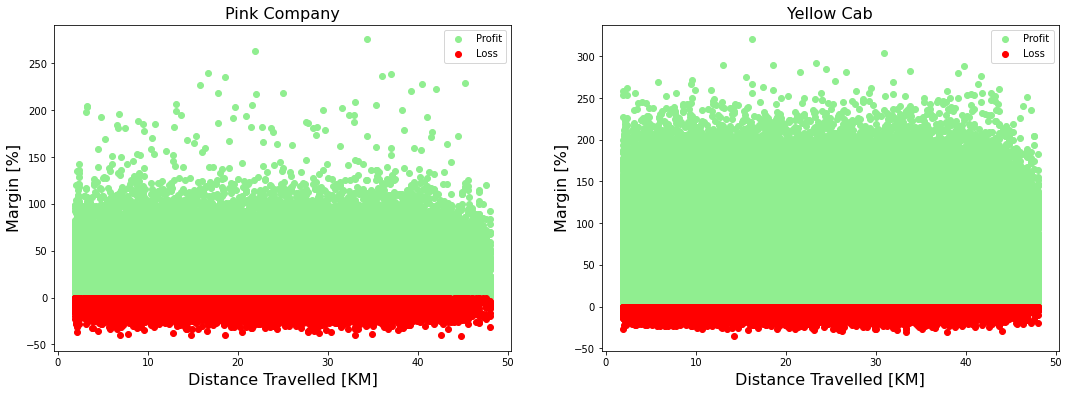

In [30]:
plt.subplots(figsize=(18,6))

# Pink Company Plot
df = data[["KM Travelled", "Margin", "Company"]]
df = df[df["Company"] == "Pink Cab"]

plt.subplot(1, 2, 1) # row 1, col 2 index 

plt.scatter(df["KM Travelled"], df["Margin"].where(df["Margin"] >= 0), color='lightgreen')
plt.scatter(df["KM Travelled"], df["Margin"].where(df["Margin"] < 0), color='red')
plt.legend(['Profit', 'Loss'])
plt.ylabel("Margin [%]", fontsize=16)
plt.xlabel("Distance Travelled [KM]", fontsize=16)
plt.title("Pink Company", fontsize=16)

# Yellow Company Plot
df = data[["KM Travelled", "Margin", "Company"]]
df = df[df["Company"] == "Yellow Cab"]

plt.subplot(1, 2, 2) # row 1, col 2 index  

plt.scatter(df["KM Travelled"], df["Margin"].where(df["Margin"] >= 0), color='lightgreen')
plt.scatter(df["KM Travelled"], df["Margin"].where(df["Margin"] < 0), color='red')
plt.legend(['Profit', 'Loss'])
plt.ylabel("Margin [%]", fontsize=16)
plt.xlabel("Distance Travelled [KM]", fontsize=16)
plt.title("Yellow Cab", fontsize=16)

plt.show()

We can observe that among both cab companies the margin distribution is uniform to a great extent along the travelled distance domian, where the yellow cab company can achieve higher profit margins and less loss margins that the Pink Company.

In the following plot we can observe also the the margins are equally spread between males and females and therefore both genders contribute propotionally in equal terms torwards the margin creation.

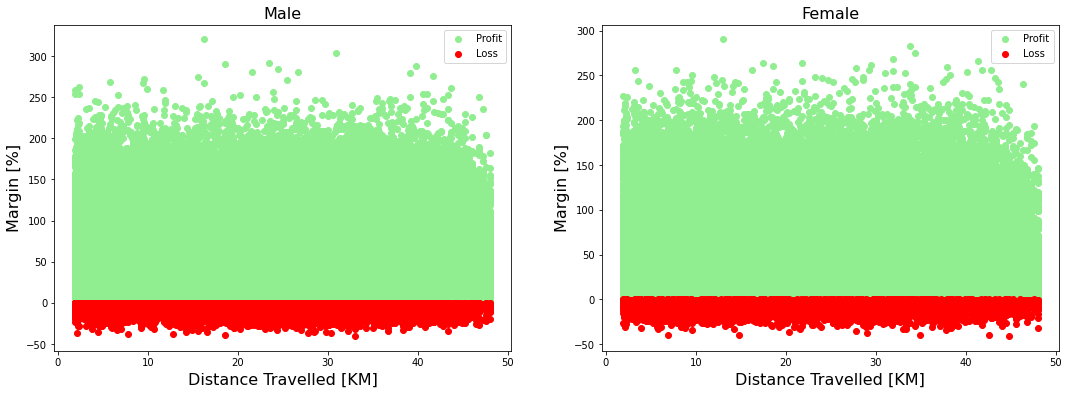

In [31]:
plt.subplots(figsize=(18,6))

# Pink Company Plot
df = data[["KM Travelled", "Margin", "Gender"]]
df = df[df["Gender"] == "Male"]

plt.subplot(1, 2, 1) # row 1, col 2 index 

plt.scatter(df["KM Travelled"], df["Margin"].where(df["Margin"] >= 0), color='lightgreen')
plt.scatter(df["KM Travelled"], df["Margin"].where(df["Margin"] < 0), color='red')
plt.legend(['Profit', 'Loss'])
plt.ylabel("Margin [%]", fontsize=16)
plt.xlabel("Distance Travelled [KM]", fontsize=16)
plt.title("Male", fontsize=16)

# Yellow Company Plot
df = data[["KM Travelled", "Margin", "Gender"]]
df = df[df["Gender"] == "Female"]

plt.subplot(1, 2, 2) # row 1, col 2 index  

plt.scatter(df["KM Travelled"], df["Margin"].where(df["Margin"] >= 0), color='lightgreen')
plt.scatter(df["KM Travelled"], df["Margin"].where(df["Margin"] < 0), color='red')
plt.legend(['Profit', 'Loss'])
plt.ylabel("Margin [%]", fontsize=16)
plt.xlabel("Distance Travelled [KM]", fontsize=16)
plt.title("Female", fontsize=16)

plt.show()

Now let's investigate the age distribution of the customers and their payment behavious in terms of using payment cards or cash for both genders.

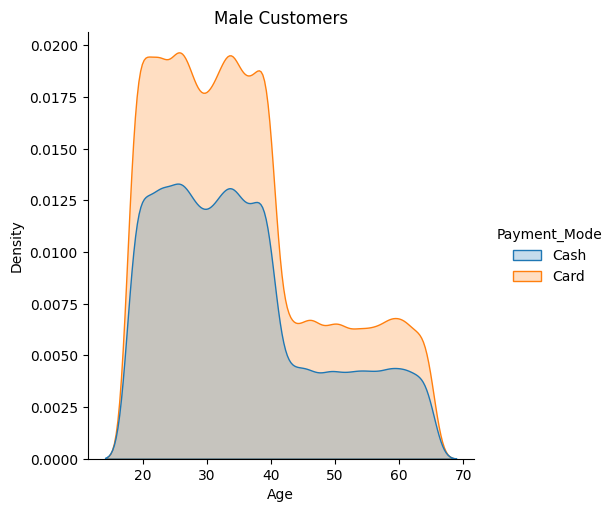

In [55]:
# Male Customer Denisty Plot
df = data[["Age", "Payment_Mode", "Gender"]]
df = df[df["Gender"] == "Male"]

hue_order = ['Cash', 'Card']
sb.displot(df, x="Age",hue="Payment_Mode", hue_order=hue_order, kind="kde", fill=True)
plt.title("Male Customers", fontsize=12)
plt.show()


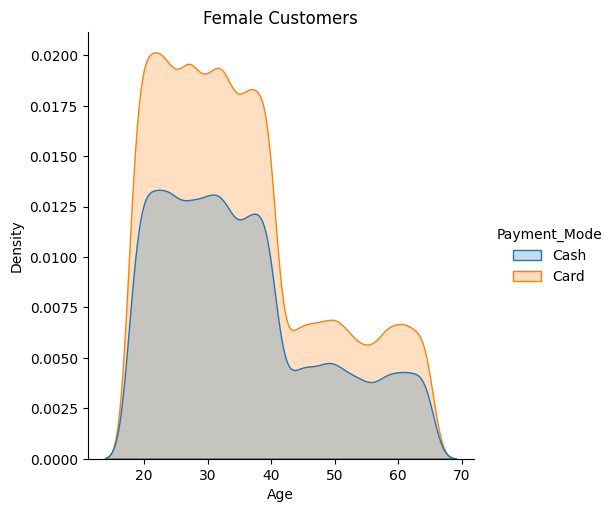

In [57]:
# Female Customer Denisty Plot
df = data[["Age", "Payment_Mode", "Gender"]]
df = df[df["Gender"] == "Female"]

hue_order = ['Cash', 'Card']
sb.displot(df, x="Age",hue="Payment_Mode", hue_order=hue_order, kind="kde", fill=True)
plt.title("Female Customers", fontsize=12)
plt.show()

We can find that for both genders males and femals, we have youth customers (< 40 years old) are more than double the number of old customers (> 40 years old)

We can also observe that almost all customers tend to use payment cards more than using cash with an approximate factor of 1.5. This observation is consistant among both genders and across the whole age span.

### 3. EDA Summary

* The yellow cab company can achieve higehr margins than the pink cab company.
* The yellow cab company has significantly provided more trips that the pink cab company. We could obseerve that by serving more customers the margins achived can be increased. 
* We could observe that among both cab companies the margin distribution is uniform to a great extent along the travelled distance domian, where the yellow cab company can achieve higher profit margins and less loss margins that the Pink Company.
* We could find that the margins are equally spread between males and females and therefore both genders contribute propotionally in equal terms torwards the margin creation.
* We could find that for both genders males and femals, we have youth customers (< 40 years old) are more than double the number of old customers (> 40 years old)
* We could observe that almost all customers tend to use payment cards more than using cash with an approximate factor of 1.5. This observation is consistant among both genders and across the whole age span.